# A Monte Carlo Simulation of Stocks
## Midterm DATA 618
### Vanita Thompson

## Background

There are many sophisticated models that can be built for forecasting problems. In this project, I will explore how a Monte Carlo Simulation can be applied in practice.  In particular, we will see how we can run a simulation when trying to predict the future stock price of a company.This approach can produce a better understanding of the range of potential outcomes and help avoid the “flaw of averages”.  

The Monte Carlo Simulations are a class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. They are often used in financial and mathematical problems and are most useful when it is difficult or impossible to use other approaches. Monte Carlo methods are mainly used in three problem classes: optimization, integration, and probability distribution.

Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. This technique can be used to understand the impact of risk and uncertainty in prediction and forecasting models. It is also referred to as multiple probability simulation.


Some modules will be imported for my simulation, 'numpy' is used for the linear algebra, 'pandas' for the data import and processing, and 'matplotlib' and 'seaborn' for data visualization.

In [1]:
#Environment Setup 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file (e.g. pd.read_csv)

In [3]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

## Data Import & Analysis

The company we will use for our analysis will be Apple (AAPL). The timeframe under consideration reflects the past 8 months, starting from January the 3rd 2020.

In [4]:
start=dt.datetime(2020,1,3)
end=dt.datetime(2020,9,20)

prices=web.DataReader('AAPL','yahoo', start, end)['Close']
prices

Date
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
2020-01-09     77.407501
                 ...    
2020-09-14    115.360001
2020-09-15    115.540001
2020-09-16    112.129997
2020-09-17    110.339996
2020-09-18    106.839996
Name: Close, Length: 180, dtype: float64

In [ ]:
In the below plot, we see that Apple stock has been increasing steadily through the years.

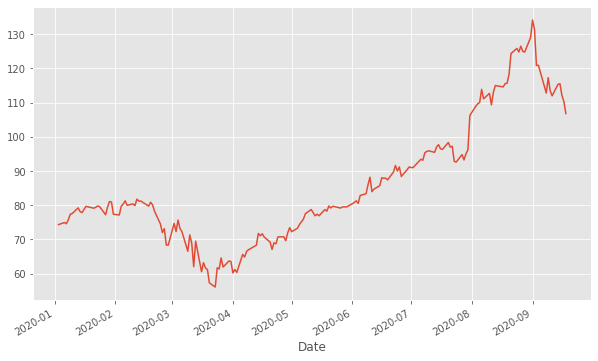

In [36]:
prices.plot(figsize=(10, 6));

We want to forecast Apple’s future stock price in this exercise. So, the first thing we’ll do is estimate its historical log returns. The method we’ll apply here is called “percent change”, and you must write “pct_change()” to obtain the simple returns from a provided dataset. We can create the formula for log returns by using NumPy’s log and then type 1 + the simple returns extracted from our data. Below is a table with Apple’s log returns.

In [5]:
returns=prices.pct_change()
returns

Date
2020-01-03         NaN
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
2020-01-09    0.021241
                ...   
2020-09-14    0.030000
2020-09-15    0.001560
2020-09-16   -0.029514
2020-09-17   -0.015964
2020-09-18   -0.031720
Name: Close, Length: 180, dtype: float64

In [6]:
last_price=prices[-1]
last_price

106.83999633789062

In [34]:
log_returns = np.log(1 + prices.pct_change())
log_returns.tail()

Date
2020-09-14    0.029559
2020-09-15    0.001559
2020-09-16   -0.029958
2020-09-17   -0.016092
2020-09-18   -0.032234
Name: Close, dtype: float64

In this graph, we have plotted the log returns, not the price, of Apple. The picture tells us the returns are normally distributed and have a stable mean. 

Text(0, 0.5, 'Frequency')

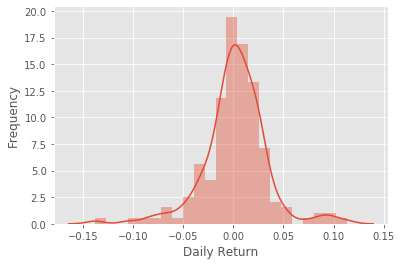

In [56]:
import seaborn as sns
log_return = np.log(1 + prices.pct_change())
#Plot
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

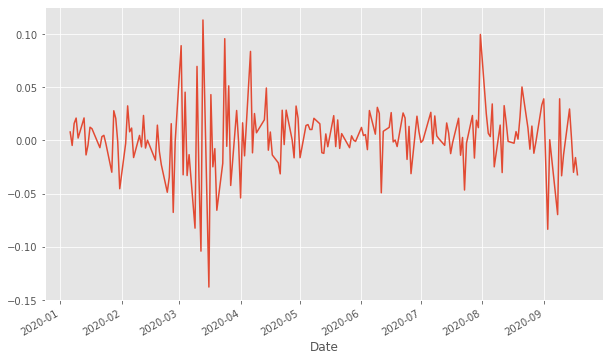

In [37]:
log_returns.plot(figsize=(10, 6));

### Predicting the Daily Return of a Stock

Brownian motion will be the main driver for estimating the return. It is a stochastic process used for modeling random behavior over time. Brownian motion has two main components:
Drift — the direction that rates of returns have had in the past. That is, the expected return of the stock. The variance is multiplied by 0.5, becasue historical values are eroded in the future.
Volatility — the historical volatility multiplied by a random, standard normal variable.

In [58]:
from IPython.display import Image
img = 'https://github.com/Vthomps000/DATA618/blob/main/Stock_Browinian.png'
Image(url= img)

In [61]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/Vthomps000/DATA618/blob/main/Stock_Browinian.png")

Now, we will explore their mean and variance, as we will need them for the calculation of the Brownian motion.
We need to know how to calculate mean and variance.

In [38]:
u = log_returns.mean()
u

0.0020248482487600977

In [39]:
var = log_returns.var()
var

0.0010280524956860174

First, I’ll compute the drift component. It is the best approximation of future rates of return of the stock. The formula to use here will be “U”, which equals the average log return, minus half its variance.

In [40]:
drift = u - (0.5 * var)
drift

0.001510822000917089

Next, we will create a variable, called “stdev”, and we will assign to it the standard deviation of log returns. We said the Brownian motion comprises the sum of the drift and a variance adjusted by “E” to the power of “R”, so we will use this block in the second part of the expression.

In [41]:
stdev = log_returns.std()
stdev

0.032063257721042904

We’ve examined the first Brownian motion element in our simulation.

Next, we will create the second component and will show you how this would allow us to run a simulation about a firm’s future stock price.

Until now, we obtained the “drift” and standard deviation values we will need for the calculation of daily returns. To proceed with our task, we should convert these values into NumPy arrays and begin the simulation below.

## Simulation

Now that we have built these tools and calculated all necessary variables, we are ready to calculate daily returns. I would like to specify the time intervals we will use will be 1,000, because we are interested in forecasting the stock price for the upcoming 1,000 days. The variable 'num_days' includes the days the stock market was open, excluding 9 holidays and weekends.

In [25]:
# number of simulation
num_simulations=1000
num_days=259

In [26]:
simulation_df=pd.DataFrame()

Finally, we can generate values for our simulation. The simulation will generate values foor the expected stock price. We must set up a loop that begins in day 1 and ends at day 1,000. We can simply write down the formula for the expected stock price on day T in Pythonic. It will be equal to the price in day T minus 1, times the daily return observed in day T.

In [27]:
for x in range(num_simulations):
    count=0
    daily_vol=returns.std()
    
    price_series=[]
    price=last_price*(1+np.random.normal(0,daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count==258:
            break
        price=price_series[count]*(1+np.random.normal(0,daily_vol))
        price_series.append(price)
        count+=1
    
    simulation_df[x]=price_series

Below is a dataframe of predictions of stock prices from our above simulation.

In [28]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,110.330039,102.629479,107.595123,110.167973,109.548732,109.862139,107.365025,103.185652,104.828894,108.543348,...,111.997564,110.307405,108.653467,112.016646,110.017643,103.399592,109.613330,109.808283,102.799303,111.839014
1,109.290963,99.878339,105.205882,115.658523,112.589544,110.257352,108.180157,102.527597,103.538593,110.817373,...,111.752794,106.879211,109.255705,118.558916,110.596974,104.621984,105.339060,107.344566,101.882160,113.273204
2,107.840635,105.794784,108.516644,115.777326,113.431305,108.854374,107.590443,105.314878,104.820401,113.302455,...,112.791182,100.350152,109.669562,117.178063,117.507265,105.854604,110.043286,114.292112,102.273057,108.595820
3,106.453058,107.633482,106.685564,117.624131,111.073462,108.815299,107.343473,104.940583,106.149804,113.982674,...,104.714367,99.586995,113.004504,115.841470,112.396256,103.315459,105.464314,116.268498,107.205776,111.727835
4,102.651272,110.587668,108.662144,113.474253,111.605141,110.722335,108.363653,104.856535,105.164329,109.679850,...,104.579242,97.446086,110.498957,121.535089,118.908314,102.767184,107.433424,115.672756,105.461184,104.430578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,148.730047,88.224716,54.321431,66.783266,174.853035,117.190347,182.881366,85.641253,55.319790,80.267842,...,49.786835,125.556416,88.171080,134.976427,217.731416,103.271679,156.563829,97.012831,104.653161,64.895612
255,143.415749,90.666354,52.472645,68.895945,174.676462,113.477808,188.494788,85.343211,54.513866,76.544808,...,47.742246,126.358086,92.866304,134.875737,209.420307,99.480213,147.602994,98.204221,105.143687,64.848713
256,135.733559,89.900624,50.281215,70.943068,165.534313,114.248954,196.372193,84.477954,54.966516,79.557208,...,46.357452,129.135829,94.225284,133.569827,200.570489,99.179715,146.891524,101.900402,105.926456,66.141596
257,131.216087,94.377324,48.659661,70.353507,168.775895,114.926556,194.928383,84.676045,54.316945,80.512361,...,46.026273,128.872289,88.776835,136.494530,200.040832,98.932527,147.733937,99.803014,102.536768,62.102278


With the help of the “i-loc” method and the index operator, we can indicate we need the last value from the table.

In [29]:
simulation_last_day=simulation_df.iloc[258,:]
simulation_last_day

0      129.627534
1       95.770753
2       45.691135
3       73.581945
4      175.411311
          ...    
995    100.367274
996    149.479739
997     97.984423
998    101.351467
999     66.019987
Name: 258, Length: 1000, dtype: float64

In [30]:
simulation_last_day.mean()

108.26263261791247

In [31]:
simulation_last_day.describe()

count    1000.000000
mean      108.262633
std        57.256550
min        21.481521
25%        67.691317
50%        95.528075
75%       135.799909
max       438.494368
Name: 258, dtype: float64

## Data Visualization

We can plot the simulated prices on a graph with size 19 to 8, using Matplotlib. When we execute, we will obtain possible paths of the expected stock price of Apple stock, starting from the last day for which we have data from yahoo. We called these trends iterations, since the computer will iterate through the provided formula 1000 times.
Here, we have the paths we simulated.

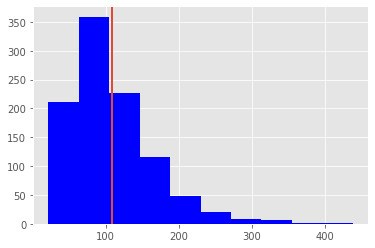

In [32]:
plt.hist(simulation_last_day, bins=10, color='b')
plt.axvline(x=simulation_last_day.mean(),linewidth=2)
plt.show()

This histogram above shows a right-skewed, or positive-skewed distribution. On a right-skewed histogram, the mean, median, and mode are all different. In this case, the mode is the highest point of the histogram, whereas the median and mean fall to the right of it (or, visually, the right of the peak). Note that the mean will always be to the right of the median.

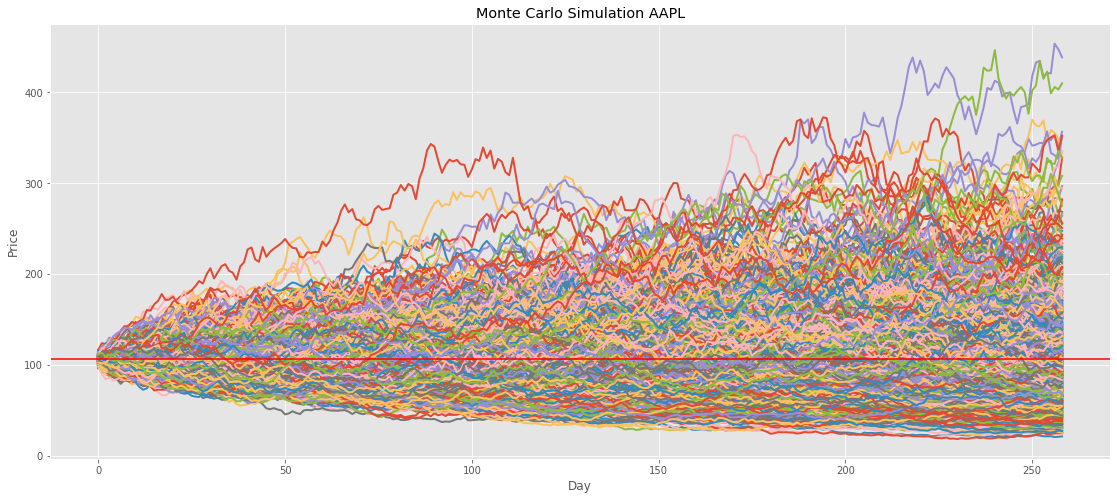

In [33]:
fig=plt.figure(figsize=(19,8))
plt.plot(simulation_df, linewidth=2)
plt.title('Monte Carlo Simulation AAPL')
plt.xlabel('Day')
plt.ylabel('Price')
plt.axhline(y=last_price, color='r', linestyle='-')
plt.show()

## Discussion

We have successfuly ran a Monte Carlo simulation that predicts Apple’s stock price 258 days into the future.
As I continue the project, I will include price_paths matrix,n calculate the probability of profitability, the expected annualized returm, and the expected daily return. Additionally, we will take a look at running multiple stock simulations at once, and We will also display some metrics from the Capital Asset Pricing Model (CAPM).

## Citations

https://pbpython.com/monte-carlo.html
https://www.investopedia.com/terms/m/montecarlosimulation.asp
https://towardsdatascience.com/the-house-always-wins-monte-carlo-simulation-eb82787da2a3